In [148]:
import numpy as np
import matplotlib.pyplot as plt

In [149]:
# Defining the Gauusian function :
# phi(x) = exp( -(x-mu)^2 / (2*sigma^2) )
# mu = mean of the distribution or the peak
#  hence the double bar gives the euclidean distance from the mean.
def gaussian_function(x, t):
    return np.exp(-1 * np.linalg.norm(x - t)**2)


In [150]:
def predict_matrix(point, weights):
    gaussian_rbf_0 = gaussian_function(np.array(point), c1)
    gaussian_rbf_1 = gaussian_function(np.array(point), c2)
    gaussian_rbf_2 = gaussian_function(np.array(point), c3)
    gaussian_rbf_3 = gaussian_function(np.array(point), c4)
    A = np.array([gaussian_rbf_0, gaussian_rbf_1,gaussian_rbf_2,gaussian_rbf_3, 1])
    return np.round(A.dot(weights))

In [151]:
# neural network architecture of 2-4-1

# 2 node input (x1, x2) (input layer)
# 4 node (each for one peak) (hidden layer)
# 1 node output (output layer)
# To find the weights for the edges to the 1-output unit. Weights associated would be:

# edge joining 1st node (peak1 output) to the output node
# edge joining 2nd node (peak2 output) to the output node
# edge joining 3rd node (peak3 output) to the output node
# edge joining 4th node (peak4 output) to the output node
# bias edge

# Hence, in the mapping function, first I calculated the similarity between the inputs and the peaks.
# Then, to find w used the equation Aw= Y in matrix form.
# Each row of A consists of

# index[0]: similarity of point with peak1
# index[1]: similarity of point with peak2
# index[2]: similarity of point with peak3
# index[3]: similarity of point with peak4
# index[4]: Bias input (1)
# Y: Output associated with the input (shape: (5,1))

# W is calculated using the same equation we use to solve linear regression using a closed solution (normal equation).

def mapping(X1, X2, ys, mu1, mu2,mu3,mu4):
    phi_1 = [gaussian_function(i, mu1) for i in zip(X1, X2)]
    phi_2 = [gaussian_function(i, mu2) for i in zip(X1, X2)]
    phi_3 = [gaussian_function(i, mu3) for i in zip(X1, X2)]
    phi_4 = [gaussian_function(i, mu4) for i in zip(X1, X2)]

    print(phi_1)
    print(phi_2)
    print(phi_3)
    print(phi_4)
    
    # ploting the gaussian and decision boundary
    plt.subplot(1, 2, 2)
    plt.gcf().set_facecolor('white')
    plt.scatter(phi_1[0], phi_2[0], label="Class_0")
    plt.scatter(phi_1[1], phi_2[1], label="Class_1")
    plt.scatter(phi_1[2], phi_2[2], label="Class_1")
    plt.scatter(phi_1[3], phi_2[3], label="Class_0")
    plt.plot([0, 0.95], [0.95, 0], "k--")
    plt.xlabel(f"$c1$", fontsize=20)
    plt.ylabel(f"$c2$", fontsize=20)
    plt.title("XOR output", fontsize=20)
    plt.legend()

    # solving problem using matrices form
    # A.W = Y
    A = []

    for i, j,k,l in zip(phi_1, phi_2, phi_3,phi_4):
        temp = []
        temp.append(i)
        temp.append(j)
        temp.append(k)
        temp.append(l)
        temp.append(1)
        A.append(temp)
    
    A = np.array(A)
    W = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(ys)
    L = W+0.00001*np.random.rand(W.shape[0])
    print(f"Predicted: {np.round(A.dot(L))}")
    print(f"Actual: {ys}")
    print(f"Weights: {L}")
    return L

[0.36787944117144233, 1.0, 0.13533528323661262, 0.36787944117144233]
[0.36787944117144233, 0.13533528323661262, 1.0, 0.36787944117144233]
[0.3678779696566208, 0.999996000008, 0.13587716498709917, 0.36935242848696326]
[0.36787613027137095, 0.13614851050840904, 0.9999910000404999, 0.37009002208677383]
Predicted: [0. 1. 1. 0.]
Actual: [0 1 1 0]
Weights: [ 2.97670018  2.0884297  -0.30272512  0.38445344 -1.8413395 ]
Input:[0 0], Predicted: 0.0
Input:[0 1], Predicted: 1.0
Input:[1 0], Predicted: 1.0
Input:[1 1], Predicted: 0.0


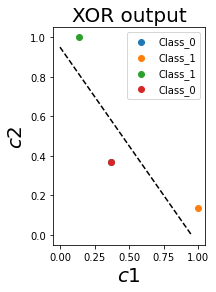

In [152]:
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
ys = np.array([0, 1, 1, 0])

# centers
c1 = np.array([0, 1])
c2 = np.array([1, 0])
c3 = np.array([0.002, 1])
c4 = np.array([1, 0.003])

w = mapping(x1, x2, ys, c1, c2, c3, c4)


# testing
print(f"Input:{np.array([0, 0])}, Predicted: {predict_matrix(np.array([0, 0]), w)}")
print(f"Input:{np.array([0, 1])}, Predicted: {predict_matrix(np.array([0, 1]), w)}")
print(f"Input:{np.array([1, 0])}, Predicted: {predict_matrix(np.array([1, 0]), w)}")
print(f"Input:{np.array([1, 1])}, Predicted: {predict_matrix(np.array([1, 1]), w)}")